In [1]:
cfp = """
UncertaiNLP welcomes submissions to topics related (but not limited) to:
* Frameworks for uncertainty representation
* Theoretical work on probability and its generalizations
* Symbolic representations of uncertainty
* Documenting sources of uncertainty
* Theoretical underpinnings of linguistic sources of variation
* Data collection (e.g., to to document linguistic variability, multiple perspectives, etc.)
* Modeling 
* Explicit representation of model uncertainty (e.g., parameter and/or hypothesis uncertainty, Bayesian NNs in NLU/NLG, verbalised uncertainty, feature density, external calibration modules)
* Disentangled representation of different sources of uncertainty (e.g., hierarchical models, prompting)
* Reducing uncertainty due to additional context (e.g., additional context, clarification questions, retrieval/API augmented models)
* Learning (or parameter estimation)
* Learning from single and/or multiple references
* Gradient estimation in latent variable models
* Probabilistic inference
* Theoretical and applied work on approximate inference (e.g., variational inference, Langevin dynamics)
* Unbiased and asymptotically unbiased sampling algorithms
* Decision making
* Utility-aware decoders and controllable generation
* Selective prediction
* Active learning
* Evaluation
* Statistical evaluation of language models
* Calibration to interpretable notions of uncertainty (e.g., calibration error, conformal prediction)
* Evaluation of epistemic uncertainty
"""

In [2]:
keywords = [
    # uncertainty
    "uncertainty",
    "variability",
    "variation",
    "aleatoric",
    "epistemic",
    "evidential", 
    "confidence",
    # annotation
    "disagreement",
    "multiple perspectives",    
    "multiple judgements",
    "multiple annotation",
    "multiple annotators",
    "multiple references",
    "active learning",
    # methods    
    "calibration",
    "conformal prediction",
    "probabilistic inference",
    "approximate inference",
    "bayesian inference",
    "bdl",
    "bayesian dl",
    "bayesian deep learning",
    "bnn",    
    "bayesian neural net",
    # decisions    
    "sampling",
    "decision-making",
    "decision making",
    "utility-aware",
    "utility aware",
    "controllable generation",
    "selective prediction",
    "selective generation",
    # analysis
    "statistical evaluation",
    "statistical analysis",            
]

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

In [4]:
import json

In [5]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [6]:
import nltk

In [7]:
# nltk.download('punkt')

In [8]:
from nltk import word_tokenize

In [9]:
with open('abstracts-2010-2025.json', 'r') as f:
    data = json.load(f)

In [10]:
import matplotlib.pyplot as plt

In [11]:
for year in data['title']:
    print(year)

2024
2023
2022
2021
2020
2019
2018
2017
2016
2015
2014
2013
2012
2011
2010


In [12]:
years = sorted(data['title'].keys())
years

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [13]:
titles = data['title']['2024']

In [14]:
len(titles)

12031

In [15]:
def preprocess_corpus(corpus):
    preprocess = lambda t: " ".join(w.lower() for w in word_tokenize(t.replace('{','').replace('}', '').replace('\\%', '%')))
    return [preprocess(t) for t in corpus]

In [16]:
preprocess_corpus(titles[:5])

["proceedings of the 20th workshop of young researchers ' roundtable on spoken dialogue systems",
 'conversational xai and explanation dialogues',
 'enhancing emotion recognition in spoken dialogue systems through multimodal integration and personalization',
 'towards personalisation of user support systems .',
 'social agents for positively influencing human psychological states']

In [17]:
%%time
preprocessed_titles = {y: preprocess_corpus(titles) for y, titles in data['title'].items()}

CPU times: user 3.68 s, sys: 28.3 ms, total: 3.71 s
Wall time: 3.73 s


In [18]:
%%time
preprocessed_abstracts = {y: preprocess_corpus(abstracts) for y, abstracts in data['abstract'].items()}

CPU times: user 24.4 s, sys: 246 ms, total: 24.6 s
Wall time: 25.2 s


In [19]:
preprocessed_titles['2024'][:5]

["proceedings of the 20th workshop of young researchers ' roundtable on spoken dialogue systems",
 'conversational xai and explanation dialogues',
 'enhancing emotion recognition in spoken dialogue systems through multimodal integration and personalization',
 'towards personalisation of user support systems .',
 'social agents for positively influencing human psychological states']

In [20]:
preprocessed_abstracts['2024'][:1]

['my main research interest is human-centric explainability , i.e. , making language models more interpretable by building applications that lower the barrier of entry to explanations . i am enthusiastic about interactive systems that pique the interest of more people beyond just the experts to learn about the inner workings of language models . my hypothesis is that users of language model applications and dialogue systems are more satisfied and trustworthy if they can look behind the curtain and get easy access to explanations of their behavior .']

In [21]:
def num_hits(t, keywords, white_space=True):
    if not white_space:
        hits = sum(w in t for w in keywords)
    else:
        hits = sum(f" {w} " in f" {t} " for w in keywords)
    return hits

def any_overlap(t, keywords, white_space=True):    
    return num_hits(t, keywords, white_space) > 0

def unique_word_overlap(t, keywords, white_space=True):
    hits = num_hits(t, keywords, white_space)
    return hits / len(set(t))

In [22]:
def make_data_frame(years, corpus, keywords):
    data_table = []
    for i, year in enumerate(years):    
        n = sum(any_overlap(t, keywords, True) for t in corpus[year])
        N = len(corpus[year])
        r = n / N * 100
        print(year, N, n, f"{r:.2f}%") # 
        data_table.append([int(year), N, n, r])
            
    return pd.DataFrame(data_table, columns=['year', 'texts', 'uncertainty-related', 'percentage'])
    

In [23]:
print("Titles")
df_t = make_data_frame(years, preprocessed_titles, keywords)
print("Abstracts")
df_a = make_data_frame(years, preprocessed_abstracts, keywords)

Titles
2010 3069 54 1.76%
2011 2290 29 1.27%
2012 3391 43 1.27%
2013 2824 34 1.20%
2014 3639 46 1.26%
2015 2958 27 0.91%
2016 4220 52 1.23%
2017 3424 37 1.08%
2018 4822 51 1.06%
2019 5074 57 1.12%
2020 7245 82 1.13%
2021 7097 92 1.30%
2022 8649 127 1.47%
2023 8982 144 1.60%
2024 12031 232 1.93%
Abstracts
2010 854 42 4.92%
2011 165 2 1.21%
2012 805 35 4.35%
2013 79 2 2.53%
2014 912 52 5.70%
2015 150 7 4.67%
2016 1830 93 5.08%
2017 2555 111 4.34%
2018 3533 173 4.90%
2019 4382 219 5.00%
2020 6669 358 5.37%
2021 6017 350 5.82%
2022 8167 515 6.31%
2023 8013 585 7.30%
2024 11170 951 8.51%


# Plotting

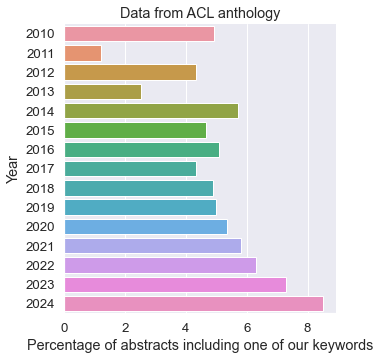

In [24]:
g = sns.catplot(data=df_a, y='year', x='percentage', kind='bar', orient='h')
_ = plt.title("Data from ACL anthology")
_ = plt.ylabel("Year")
_ = plt.xlabel("Percentage of abstracts including one of our keywords")
plt.savefig("plots/before-uncertainlp2.pdf", bbox_inches="tight")
plt.savefig("plots/before-uncertainlp2.png", bbox_inches="tight")